In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
# Pretty display for notebooks
%matplotlib inline


In [3]:
# Load the dataset
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
print (train.shape)
print (test.shape)


(42000, 785)
(28000, 784)


In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train['label'].head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [27]:
#Split the dataset
from sklearn.cross_validation import train_test_split

X = train.drop(['label'], axis = 1)
y = train['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size = 0.25, random_state = 32)

In [28]:
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))
print("Training set has {} samples.".format(y_train.shape[0]))
print("Testing set has {} samples.".format(y_test.shape[0]))

Training set has 31500 samples.
Testing set has 10500 samples.
Training set has 31500 samples.
Testing set has 10500 samples.


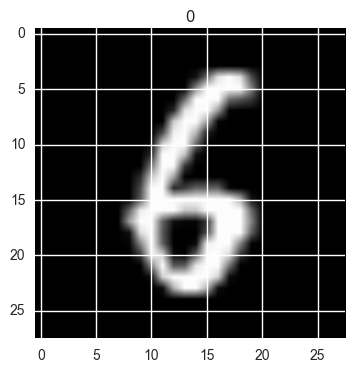

In [29]:
i=1782
img=X.iloc[i].as_matrix()
img=img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(X.iloc[i,0])

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# let's start with the n_neighbors = 5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test,y_pred)
print(y_pred)

[3 2 1 ..., 8 6 7]


In [31]:
print(accuracy_score(y_test,y_pred))

0.964380952381


In [9]:
#Let's try the random forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train, y_train)
random_pred = model.predict(X_test)
print(random_pred)

[3 2 1 ..., 8 6 7]


In [10]:
from sklearn import metrics
print(metrics.classification_report(random_pred, y_test))

             precision    recall  f1-score   support

          0       0.99      0.98      0.98      1022
          1       0.99      0.99      0.99      1149
          2       0.97      0.95      0.96      1027
          3       0.94      0.96      0.95      1096
          4       0.98      0.97      0.98      1010
          5       0.96      0.97      0.97       951
          6       0.98      0.97      0.98      1065
          7       0.97      0.98      0.98      1086
          8       0.95      0.96      0.96      1023
          9       0.96      0.96      0.96      1071

avg / total       0.97      0.97      0.97     10500



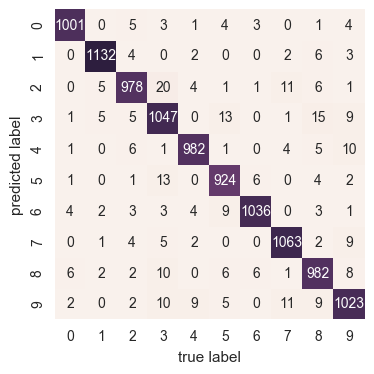

In [11]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, random_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [9]:
# Let's try the PCA
from sklearn.decomposition import PCA
n_components = 2
print ("Extracting the top %d pca_random from %d data" % (n_components, X_train.shape[0]))
pca = PCA(n_components).fit(X_train)
# pca_random = pca.components_.reshape((n_components, 28, 28))
print(pca.explained_variance_ratio_)
pca.fit(X_train)
X_train = pca.transform(X_train)
print(X_train)

Extracting the top 2 pca_random from 31500 data
[ 0.09752032  0.0711396 ]
[[ 219.30203081   25.90764633]
 [ 182.57224868 -534.25731186]
 [-802.74177039  483.29526509]
 ..., 
 [ 871.98550964 -261.94803484]
 [ 110.70262404 -517.65341915]
 [ 841.34055171 -113.1292773 ]]


In [10]:
np.cumsum(pca.explained_variance_ratio_)

array([ 0.09752032,  0.16865992])

In [15]:
n_components=([10,15,20,35,45,55,100,200,500])
variance_ratio = np.zeros(len(n_components))
i=0;
for n in n_components:
    pca = PCA(n_components=n)
    pca.fit(train)
    variance_ratio[i] = sum(pca.explained_variance_ratio_)
    i=i+1    

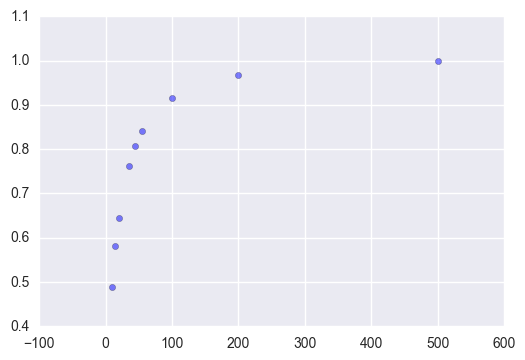

In [16]:
plt.scatter(n_components,variance_ratio, alpha=0.5)
plt.show()

In [16]:
# Let's try the n_components = 55 SKlearn's PCA method
n_components = 35
pca = PCA(n_components=35)
pca.fit(train)
transform_train = pca.transform(train)
test = np.reshape(test.size, 1)
transform_test = pca.transform(test)

/Users/xyapple/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [17]:
np.cumsum(pca.explained_variance_ratio_)

array([ 0.0974892 ,  0.16909228,  0.23055118,  0.28434413,  0.3332869 ,
        0.37631894,  0.40908937,  0.43801034,  0.4656793 ,  0.48916797,
        0.51016117,  0.53075116,  0.54777672,  0.56470455,  0.5805158 ,
        0.59534816,  0.60854505,  0.62137229,  0.63325202,  0.64477957,
        0.65550146,  0.66565342,  0.67530246,  0.6844309 ,  0.69330728,
        0.70169493,  0.70981349,  0.71758754,  0.72499387,  0.73186047,
        0.73844028,  0.74482826,  0.75082192,  0.75671105,  0.76235438])

In [24]:
# hope to combine KNN + PCA
# pca = PCA(n_components=55)
# pca.fit(X_train)
# transform_train = pca.transform(train)
# transform_test = pca.transform(test)

from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score

# let's start with the n_neighbors = 5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(transform_train, y)
knn_pred = knn.predict(transform_test)
# accuracy_score(y_test,knn_pred)
print(knn_pred)
# print(accuracy_score(y_test,knn_pred))

[0]


In [25]:
from sklearn.metrics import accuracy_score
print(accuracy_score(knn_pred, y_test))

ValueError: Found arrays with inconsistent numbers of samples: [    1 10500]

In [82]:
# Let's use the SVM + PCA
from sklearn import svm
clf = svm.SVC()
clf = clf.fit(transform_train, y_train)

In [83]:
clf

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [85]:
predicted = clf.predict(transform_test)

In [108]:
# from sklearn.metrics import classification_report
# from sklearn.metrics import confusion_matrix

# # print(classification_report(y_test, predicted))
# print(confusion_matrix(predicted, y_test))